In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,Flatten,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

In [14]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 
"""drive.mount('drive')
%cd drive/My Drive/parkinsons-mrı
!ls"""

Mounted at /content/drive


"drive.mount('drive')\n%cd drive/My Drive/parkinsons-mrı\n!ls"

In [ ]:
os.chdir("/content/drive/My Drive/parkinsons-mrı")


In [57]:

os.chdir("/content/drive/My Drive/parkinsons-mrı")

if os.path.isdir("train/normal") is False:
    os.makedirs("train/normal")
    os.makedirs("train/parkinson")
    os.makedirs("test/normal")
    os.makedirs("test/parkinson")
     
    for c in random.sample(glob.glob("ep2d_diff_3scan_trace_p2_ADC_DFC_*"),25):
        shutil.move(c, "train/normal" )
    for c in random.sample(glob.glob("ep2d_diff_3scan_trace_p2_TRACEW_DFC_*"),50):
        shutil.move(c, "train/normal" )
    for c in random.sample(glob.glob("Mag_Images_*"),65):
        shutil.move(c, "train/normal" )
    for c in random.sample(glob.glob("mIP_Images(SW)_*"),60):
        shutil.move(c, "train/normal" )
    for c in random.sample(glob.glob("Pha_Images_*"),65):
        shutil.move(c, "train/normal" )
    for c in random.sample(glob.glob("SWI_Images_*"),65):
        shutil.move(c, "train/normal" )
    for c in random.sample(glob.glob("t1_fl3d_sag_p4_iso_1.0_*"),160):
        shutil.move(c, "train/normal" )
    for c in random.sample(glob.glob("t2_tirm_tra_dark-fluid_*"),25):
        shutil.move(c, "train/normal" )
    for c in random.sample(glob.glob("t2_tse_tra_*"),25):
        shutil.move(c, "train/normal" )

    for c in random.sample(glob.glob("dReg_-_sDW_SSh_SENSE_*"),20):
        shutil.move(c, "train/parkinson")
    for c in random.sample(glob.glob("DUAL_TSE_*"),40):
        shutil.move(c, "train/parkinson")
    for c in random.sample(glob.glob("Reg_-_sDW_SSh_SENSE_*"),40):
        shutil.move(c, "train/parkinson")
    for c in random.sample(glob.glob("sDW_SSh_*"),40):
        shutil.move(c, "train/parkinson")
    for c in random.sample(glob.glob("Survey_SHC_*"),4):
        shutil.move(c, "train/parkinson")
    for c in random.sample(glob.glob("T1W_FFE_*"),20):
        shutil.move(c, "train/parkinson")
    for c in random.sample(glob.glob("T2W_FLAIR_*"),20):
        shutil.move(c, "train/parkinson")
    for c in random.sample(glob.glob("T2W_TSE_*"),15):
        shutil.move(c, "train/parkinson")
  
    for c in random.sample(glob.glob("ep2d_diff_3scan_trace_p2_ADC_DFC_*"),5):
        shutil.move(c, "test/normal" )
    for c in random.sample(glob.glob("ep2d_diff_3scan_trace_p2_TRACEW_DFC_*"),10):
        shutil.move(c, "test/normal" )
    for c in random.sample(glob.glob("Mag_Images_*"),7):
        shutil.move(c, "test/normal" )
    for c in random.sample(glob.glob("mIP_Images(SW)_*"),5):
        shutil.move(c, "test/normal" )
    for c in random.sample(glob.glob("Pha_Images_*"),7):
        shutil.move(c, "test/normal" )
    for c in random.sample(glob.glob("SWI_Images_*"),7):
        shutil.move(c, "test/normal" )
    for c in random.sample(glob.glob("t1_fl3d_sag_p4_iso_1.0_*"),16):
        shutil.move(c, "test/normal" )
    for c in random.sample(glob.glob("t2_tirm_tra_dark-fluid_*"),5):
        shutil.move(c, "test/normal" )
    for c in random.sample(glob.glob("t2_tse_tra_*"),5):
        shutil.move(c, "test/normal" )

    for c in random.sample(glob.glob("dReg_-_sDW_SSh_SENSE_*"),2):
        shutil.move(c, "test/parkinson")
    for c in random.sample(glob.glob("DUAL_TSE_*"),4):
        shutil.move(c, "test/parkinson")
    for c in random.sample(glob.glob("Reg_-_sDW_SSh_SENSE_*"),4):
        shutil.move(c, "test/parkinson")
    for c in random.sample(glob.glob("sDW_SSh_*"),4):
        shutil.move(c, "test/parkinson")
    for c in random.sample(glob.glob("Survey_SHC_*"),1):
        shutil.move(c, "test/parkinson")
    for c in random.sample(glob.glob("T1W_FFE_*"),2):
        shutil.move(c, "test/parkinson")
    for c in random.sample(glob.glob("T2W_FLAIR_*"),2):
        shutil.move(c, "test/parkinson")
    for c in random.sample(glob.glob("T2W_TSE_*"),3):
        shutil.move(c, "test/parkinson")
os.chdir("../../")

In [59]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt 
from glob import glob

In [60]:
train_path= "/content/drive/My Drive/parkinsons-mrı/train"
test_path= "/content/drive/My Drive/parkinsons-mrı/test"


In [61]:
train_data = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=train_path, target_size=(224,224),classes=["normal","parkinson"],batch_size=10)
test_data = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=test_path, target_size=(224,224),classes=["normal","parkinson"],batch_size=10,shuffle=False)

Found 739 images belonging to 2 classes.
Found 89 images belonging to 2 classes.


In [62]:
imgs,labels=next(train_data)

In [63]:
print(labels)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [11]:

numberOfClass= len(glob(train_path+"/*"))
numberOfClass

2

# VGG 16 İLE EĞİTİM

In [12]:
vgg = VGG16()

vgg_layer_list = vgg.layers
print(vgg_layer_list)



553467096/553467096 [==============================] - 3s 0us/step
[<keras.engine.input_layer.InputLayer object at 0x7fc2f9e42160>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7fc2f9e42910>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7fc2f9e34c70>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fc2f9d62760>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7fc2f9d2df70>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7fc2f9d2a940>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fc2f9ce5550>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7fc2f9d2a070>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7fc2f9ceaa30>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7fc2f9cf1640>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fc2f9cf12b0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7fc2f9cf5b80>, <keras.layers.convolutional.conv2d.Conv2D object at 0x7fc2f9cfd580>, <keras.layers.convo

In [13]:
model = Sequential()
for i in range(len(vgg_layer_list)-1):
  model.add(vgg_layer_list[i])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [14]:
for layers in model.layers:
  layers.trainable = False
  
model.add(Dense(numberOfClass , activation="softmax"))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [15]:
model.compile(loss = "categorical_crossentropy",
              optimizer="rmsprop",
              metrics= ["accuracy"])

In [16]:



batch_size = 32

hist = model.fit(train_data,epochs=2,
                           validation_data= test_data,
                           verbose=2)

Epoch 1/2
74/74 - 230s - loss: 0.3552 - accuracy: 0.8972 - val_loss: 0.0435 - val_accuracy: 0.9888 - 230s/epoch - 3s/step
Epoch 2/2
74/74 - 5s - loss: 0.0502 - accuracy: 0.9824 - val_loss: 0.0333 - val_accuracy: 0.9775 - 5s/epoch - 64ms/step


confusion matrix without normakization
[[67  0]
 [ 2 20]]


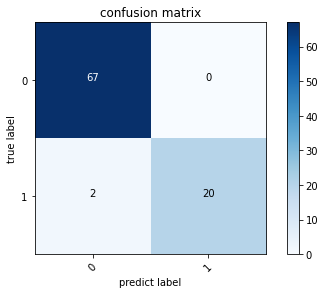

In [17]:
test_labels=test_data.classes
pred=model.predict(x=test_data,verbose=0)
cm=confusion_matrix(y_true=test_labels, y_pred=np.argmax(pred,axis=1))

test_data.class_indices
cm_plot_labels=["0","1"]
def plot_cm(cm,classes,normalize=False,
            title="confusion matrix", cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation="nearest",cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    if normalize:
        cm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
    else:
        print("confusion matrix without normakization")
    print(cm)
    
    tresh=cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment="center",
                 color="white" if cm[i,j]>tresh else "black")
    
    
    plt.tight_layout()
    plt.ylabel("true label")
    plt.xlabel("predict label")
test_data.class_indices

plot_cm(cm=cm,classes=cm_plot_labels,title="confusion matrix")


# **MOBİLENET İLE EĞİTİM**

In [18]:
mobile=tf.keras.applications.mobilenet.MobileNet()
mobile.summary()
mobile.input
from tensorflow.keras.models import Model


x=mobile.layers[-1].output
#♠xte depolanan önceki katmanları (x) ile outputa ekledik!!
output=Dense(units=2,activation="softmax")(x)    
  
model2=Model(inputs=mobile.input,outputs=output)
model2.summary()   




#sadece son 23 katman eğitilsin
for layer in model2.layers[:-23]:
    layer.trainable=False
model2.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

In [19]:
train_data = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=train_path, target_size=(224,224),classes=["normal","parkinson"],batch_size=10)
test_data = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=test_path, target_size=(224,224),classes=["normal","parkinson"],batch_size=10,shuffle=False)

Found 739 images belonging to 2 classes.
Found 89 images belonging to 2 classes.


In [20]:
model2.compile(optimizer=Adam(learning_rate=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])

model2.fit(x=train_data,validation_data=test_data,epochs=10,verbose=2)

Epoch 1/10
74/74 - 10s - loss: 0.6623 - accuracy: 0.7970 - val_loss: 0.6579 - val_accuracy: 0.8090 - 10s/epoch - 140ms/step
Epoch 2/10
74/74 - 4s - loss: 0.6349 - accuracy: 0.9648 - val_loss: 0.6561 - val_accuracy: 0.8090 - 4s/epoch - 50ms/step
Epoch 3/10
74/74 - 4s - loss: 0.6218 - accuracy: 0.9892 - val_loss: 0.6138 - val_accuracy: 1.0000 - 4s/epoch - 55ms/step
Epoch 4/10
74/74 - 3s - loss: 0.6129 - accuracy: 0.9892 - val_loss: 0.6041 - val_accuracy: 1.0000 - 3s/epoch - 47ms/step
Epoch 5/10
74/74 - 4s - loss: 0.6027 - accuracy: 0.9959 - val_loss: 0.5976 - val_accuracy: 0.9888 - 4s/epoch - 47ms/step
Epoch 6/10
74/74 - 4s - loss: 0.5941 - accuracy: 0.9946 - val_loss: 0.5992 - val_accuracy: 0.9551 - 4s/epoch - 59ms/step
Epoch 7/10
74/74 - 3s - loss: 0.5838 - accuracy: 0.9919 - val_loss: 0.5803 - val_accuracy: 0.9663 - 3s/epoch - 47ms/step
Epoch 8/10
74/74 - 3s - loss: 0.5749 - accuracy: 0.9838 - val_loss: 0.6411 - val_accuracy: 0.6404 - 3s/epoch - 46ms/step
Epoch 9/10
74/74 - 4s - loss:

confusion matrix without normakization
[[61  6]
 [ 1 21]]


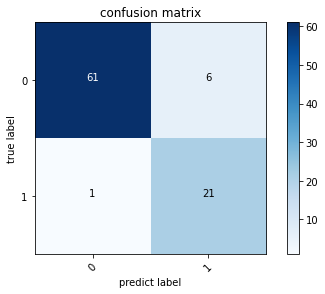

In [21]:
#%tahmin

test_labels=test_data.classes
pred=model2.predict(x=test_data,verbose=0)
cm=confusion_matrix(y_true=test_labels, y_pred=np.argmax(pred,axis=1))

test_data.class_indices
cm_plot_labels=["0","1"]
def plot_cm(cm,classes,normalize=False,
            title="confusion matrix", cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation="nearest",cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    if normalize:
        cm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
    else:
        print("confusion matrix without normakization")
    print(cm)
    
    tresh=cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment="center",
                 color="white" if cm[i,j]>tresh else "black")
    
    
    plt.tight_layout()
    plt.ylabel("true label")
    plt.xlabel("predict label")
test_data.class_indices

plot_cm(cm=cm,classes=cm_plot_labels,title="confusion matrix")


In [22]:
import cv2
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
import keras
from keras.models import Sequential, Model,load_model
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from google.colab.patches import cv2_imshow
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform

In [23]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator()

In [24]:
train_generator = train_datagen.flow_from_directory("/content/drive/My Drive/parkinsons-mrı/train",target_size=(224, 224),batch_size=32,shuffle=True,class_mode='binary')
test_generator = test_datagen.flow_from_directory("/content/drive/My Drive/parkinsons-mrı/test",target_size=(224,224),batch_size=32,shuffle=False,class_mode='binary')

Found 739 images belonging to 2 classes.
Found 89 images belonging to 2 classes.


In [25]:
def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

In [26]:
def convolutional_block(X, f, filters, stage, block, s=2):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [27]:
def ResNet50(input_shape=(224, 224, 3)):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

In [28]:
base_model = ResNet50(input_shape=(224, 224, 3))


In [29]:
headModel = base_model.output
headModel = Flatten()(headModel)
headModel=Dense(256, activation='relu', name='fc1',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel=Dense(128, activation='relu', name='fc2',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel = Dense( 1,activation='sigmoid', name='fc3',kernel_initializer=glorot_uniform(seed=0))(headModel)

In [30]:
model = Model(inputs=base_model.input, outputs=headModel)


In [31]:
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_3[0][0]']                
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 64  9472        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                            

In [32]:
base_model.load_weights("/content/drive/My Drive/keras/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5")


In [33]:
for layer in base_model.layers:
    layer.trainable = False

In [34]:
for layer in model.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fc2e00d9be0> False
<keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7fc2e00f2970> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fc2f039f820> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fc2e024d7c0> False
<keras.layers.core.activation.Activation object at 0x7fc2f07341c0> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fc2e00ec4c0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fc2e00ecd60> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fc2f03b4f40> False
<keras.layers.core.activation.Activation object at 0x7fc2f0cc9850> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7fc2e00f58e0> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fc2e00e52b0> False
<keras.layers.core.activation.Activation object at 0x7fc2e01d2670> False
<keras.layers.convolutional

In [35]:
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)


In [36]:
mc = ModelCheckpoint('/content/drive/My Drive/best_model.h5', monitor='val_accuracy', mode='max')


In [37]:
H = model.fit_generator(train_generator,validation_data=test_generator,epochs=100,verbose=1,callbacks=[mc,es])


<ipython-input-37-0904d4223555>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(train_generator,validation_data=test_generator,epochs=100,verbose=1,callbacks=[mc,es])


RuntimeError: ignored